## Reading the Data

In [8]:
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [9]:
df=pd.read_csv(r"C:\Users\LAPTOP\Desktop\Data Science\Project\garments_worker_productivity.csv")
df

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889



`date` : The date of the observation <br>
`day` : The day of the week (Sunday to Saturday) <br>
`quarter` : The quarter of the year (1 to 4) <br>
`department` : The department in which the worker is employed (e.g., finishing, finishing1, finishing2, ...) <br>
`team` : The team number in which the worker is employed (1 to 12) <br>
`targeted_productivity` : The targeted productivity for the worker on a given day <br>
`smv` : The standard minute value (SMV) for the task being performed by the worker <br>
`wip` : The work in progress (WIP) for the task being performed by the worker <br>
`over_time` : The overtime hours worked by the worker on a given day <br>
`incentive` : The incentive given to the worker on a given day <br>
`idle_time` : The idle time for the worker on a given day <br>
`idle_men` : The number of idle workers on a given day <br>
`no_of_workers` : The number of workers in the team on a given day <br>
`actual_productivity` : The actual productivity achieved by the worker on a given day <br>


## Understanding the Data


In [10]:
def df_information(dataframe):
    print("\n\n")
    print(" NUMBER OF ROWS ".center(120,'-'), end = "\n\n")
    print("There are {} total records/rows.\n".format(dataframe.shape[0]))
    
    print(" NUMBER OF Columns ".center(120,'-'), end = "\n\n")
    print("There are {} features/attributes.\n".format(dataframe.shape[1]))
    
    print(" ATTRIBUTES TYPES ".center(120,'-'), end = "\n\n")
    print(dataframe.dtypes)
    
    print(" HEAD ".center(120,'-'), end = "\n\n")
    display(HTML(dataframe.head().to_html()))
    print("\n")
    
    print(" TAIL ".center(120,'-'), end = "\n\n")
    display(HTML(dataframe.tail().to_html()))
    print("\n")
    
    print(" NULL VALUES ".center(110,'-'), end = "\n\n")
    print(dataframe.isna().sum())
    
    print(" DATAFRAME INFORMATION ".center(110,'-'), end = "\n\n")
    print(dataframe.info())

In [11]:
df_information(df)




---------------------------------------------------- NUMBER OF ROWS ----------------------------------------------------

There are 1197 total records/rows.

-------------------------------------------------- NUMBER OF Columns ---------------------------------------------------

There are 15 features/attributes.

--------------------------------------------------- ATTRIBUTES TYPES ---------------------------------------------------

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object
---------------------------------------------------

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382




--------------------------------------------------------- TAIL ---------------------------------------------------------



,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722




------------------------------------------------ NULL VALUES -------------------------------------------------

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64
------------------------------------------- DATAFRAME INFORMATION --------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   depart

* We have some null values in `wip` feature, so we'll replace them with mean value

In [12]:
mean_wip=df['wip'].mean()
df['wip'].fillna(mean_wip, inplace=True)
mean_wip

1190.4659913169319

In [13]:
print(f"Total dataset Length before: {df.shape}")

df=df[df["actual_productivity"]>0.1]

print(f"Total dataset Length after filtering with actual_productivity threshold: {df.shape}")

Total dataset Length before: (1197, 15)
Total dataset Length after filtering with actual_productivity threshold: (1197, 15)


In [14]:
df.head(10)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.000000,6720,38,0.0,0,0,56.0,0.800125
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,1190.465991,960,0,0.0,0,0,8.0,0.755167
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.000000,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.000000,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.000000,6900,45,0.0,0,0,57.5,0.750428


# Data Visualization

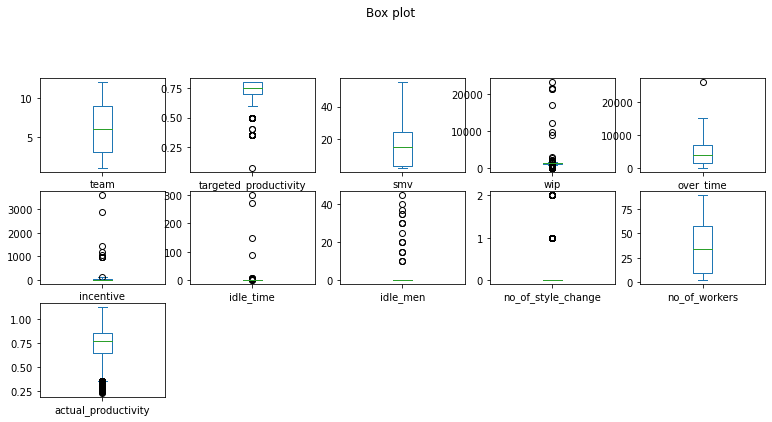

In [15]:
df.plot(kind="box", subplots=True,layout=(5,5), figsize=(13,10), title="Box plot")
plt.show()

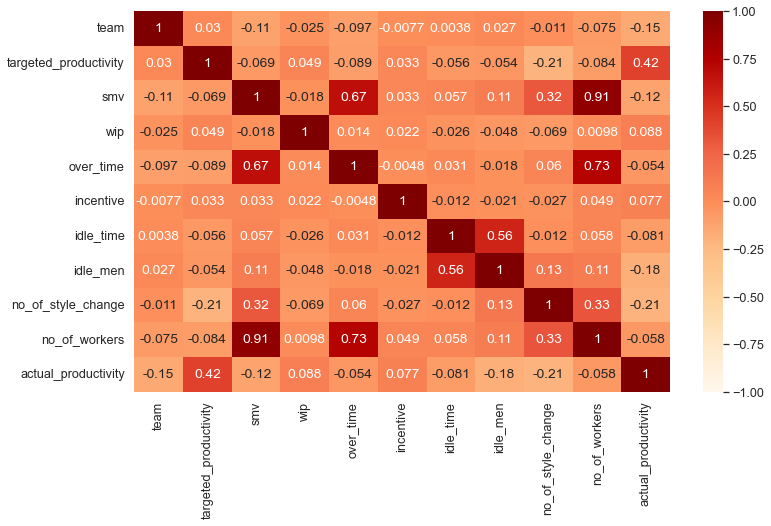

In [16]:
sns.set(font_scale=1.15)
plt.figure(figsize=(12,7))
sns.heatmap(
    df.corr(),        
    cmap='OrRd', 
    annot=True, 
    vmin=-1, vmax=1);

# Applying ML Algorithms

In [17]:
#transform data

#Convert Catogorical variables to numerical values

df=pd.get_dummies(df, columns=['department','day', 'quarter'])

In [18]:
#standardize numerical values

scaler=StandardScaler()
df[['wip', 'smv', 'no_of_workers', 'no_of_style_change']]=scaler.fit_transform(df[['wip', 'smv', 'no_of_workers', 'no_of_style_change']])

In [19]:
#Linear Regression Algorithm 
#data extraction

# predictors=['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers']

X=df.drop(['actual_productivity', 'date'], axis = 1)
y=df['actual_productivity']

In [20]:
X

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5
0,8,0.80,1.014552,-0.059113,7080,98,0.0,0,-0.351617,1.099229,...,0,0,1,0,0,1,0,0,0,0
1,1,0.75,-1.016778,0.000000,960,0,0.0,0,-0.351617,-1.199268,...,0,0,1,0,0,1,0,0,0,0
2,11,0.80,-0.333878,-0.159466,3660,50,0.0,0,-0.351617,-0.185225,...,0,0,1,0,0,1,0,0,0,0
3,12,0.80,-0.333878,-0.159466,3660,50,0.0,0,-0.351617,-0.185225,...,0,0,1,0,0,1,0,0,0,0
4,6,0.80,0.990783,-0.014670,1920,50,0.0,0,-0.351617,0.964023,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,10,0.75,-1.111853,0.000000,960,0,0.0,0,-0.351617,-1.199268,...,0,0,0,0,1,0,1,0,0,0
1193,8,0.70,-1.020434,0.000000,960,0,0.0,0,-0.351617,-1.199268,...,0,0,0,0,1,0,1,0,0,0
1194,7,0.65,-1.020434,0.000000,960,0,0.0,0,-0.351617,-1.199268,...,0,0,0,0,1,0,1,0,0,0
1195,9,0.75,-1.111853,0.000000,1800,0,0.0,0,-0.351617,-0.883788,...,0,0,0,0,1,0,1,0,0,0


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
print(f'alpha={model.intercept_}')
print(f'alpha={model.coef_}')
r2_score = model.score(X_test,y_test)
print("\n\nLinear Regression accuracy: " ,r2_score*100,'%')


alpha=0.31522097332966414
alpha=[-8.16140737e-03  7.14497500e-01 -8.35806377e-02  5.87909244e-03
 -4.16016006e-06  4.72793277e-05  3.22641109e-04 -9.21530420e-03
 -1.71835267e-02  1.17140027e-01 -8.63747839e-03  5.03251992e-02
 -4.16877208e-02 -6.89529141e-03  2.47975797e-02 -5.93029549e-03
 -2.17748709e-02  1.78701201e-02 -8.06724195e-03 -1.54557039e-02
 -1.19368123e-02 -2.01896591e-02 -2.49520778e-02  7.25342531e-02]


Linear Regression accuracy:  19.97249698668001 %


* So Linear Regression is not performing well, So let's try some other models

In [24]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


models = {"Linear Regression": LinearRegression(),
          "Support Vector Regression (SVR)" : SVR(),
          "Random Forest Regression": RandomForestRegressor()
         }

for name , model in models.items():
    
    model.fit(X_train, y_train)
    score = model.score(X_test,y_test)
    print(f"{name} accuracy: " ,score*100,'%')

Linear Regression accuracy:  19.97249698668001 %
Support Vector Regression (SVR) accuracy:  2.1684216596857153 %
Random Forest Regression accuracy:  47.83407472482198 %


* 

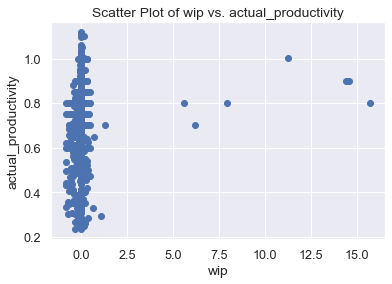

In [25]:
plt.scatter(df['wip'], df['actual_productivity'])
plt.xlabel('wip')
plt.ylabel('actual_productivity')
plt.title('Scatter Plot of wip vs. actual_productivity')
plt.show()